In [1]:
# This notebook will use optimized machine learning models
# This notebook is for predicting the heart failure using all the features and the selected features after feature selection

In [2]:
# Import all the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [3]:
# Load and read the dataset

df = pd.read_csv('Riza_Capstone_Original Dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
# See the statistical summary

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
# See the class distribution

print(df.groupby('DEATH_EVENT').size())

DEATH_EVENT
0    203
1     96
dtype: int64


In [6]:
# Check if the datatypes are correct for all columns

df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
# age must be int64
df['age'] = df['age'].astype('int64')

# anaemia must be int64
df['anaemia'] = df['anaemia'].astype('int64')

# creatinine_phosphokinase must be int64
df['creatinine_phosphokinase'] = df['creatinine_phosphokinase'].astype('int64')

# platelets must be int64
df['platelets'] = df['platelets'].astype('int64')


## Look again at the datatypes after corrections

df.dtypes

age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                     int64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [8]:
new_df = df[['age', 'anaemia', 'diabetes', 'platelets', 'serum_creatinine', 'sex', 'smoking']]
new_df

,age,anaemia,diabetes,platelets,serum_creatinine,sex,smoking
0,75,0,0,265000,1.9,1,0
1,55,0,0,263358,1.1,1,0
2,65,0,0,162000,1.3,1,1
3,50,1,0,210000,1.9,1,0
4,65,1,1,327000,2.7,0,0
...,...,...,...,...,...,...,...
294,62,0,1,155000,1.1,1,1
295,55,0,0,270000,1.2,0,0
296,45,0,1,742000,0.8,0,0
297,45,0,0,140000,1.4,1,1


In [9]:
X = new_df.iloc[:, 0:8].values
X

array([[75. ,  0. ,  0. , ...,  1.9,  1. ,  0. ],
       [55. ,  0. ,  0. , ...,  1.1,  1. ,  0. ],
       [65. ,  0. ,  0. , ...,  1.3,  1. ,  1. ],
       ...,
       [45. ,  0. ,  1. , ...,  0.8,  0. ,  0. ],
       [45. ,  0. ,  0. , ...,  1.4,  1. ,  1. ],
       [50. ,  0. ,  0. , ...,  1.6,  1. ,  1. ]])

In [10]:
# Create a dependent variable Y

Y = df.iloc[:, 12:].values
Y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [11]:
# Perform feature scaling

from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
X[:, [1, 4, 5]] = minmaxscaler.fit_transform(X[:, [1, 4, 5]])

In [12]:
# Split the dataset into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, train_size = 0.70, random_state=0)

In [13]:
# To Show the Shapes of X and Y Data
print(X.shape)
print(Y.shape)

(299, 7)
(299, 1)


In [14]:
# To Show the Shapes of the New X Objects
print(X_train.shape)
print(X_test.shape)

(209, 7)
(90, 7)


In [15]:
# To Show the Shapes of the New Y Objects
print(Y_train.shape)
print(Y_test.shape)

(209, 1)
(90, 1)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [17]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('NN', MLPClassifier()))
models

[('LR', LogisticRegression(max_iter=1000000)),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC()),
 ('NN', MLPClassifier())]

In [18]:
# For Test Options and Evaluation Metric
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

results = []
names = []

for name, model in models:
	k_Fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=None)
	cv_results = cross_val_score(model, X, Y, cv=k_Fold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	printed_results = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(printed_results)

C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

LR: 0.678966 (0.015327)
LDA: 0.702529 (0.077485)
KNN: 0.635402 (0.035127)
CART: 0.585287 (0.070098)
NB: 0.702414 (0.073388)


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

SVM: 0.678966 (0.015327)


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was pass

NN: 0.612299 (0.140188)


In [19]:
# To Instantiate the Model (Using the Default Parameters)
logistic_regression = LogisticRegression(max_iter=100000, random_state=0)

# To Fit the Training Dataset into Logistic Regression Model
logistic_regression.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_LogReg = logistic_regression.predict(X_test)
Y_predict_LogReg

C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual Value')

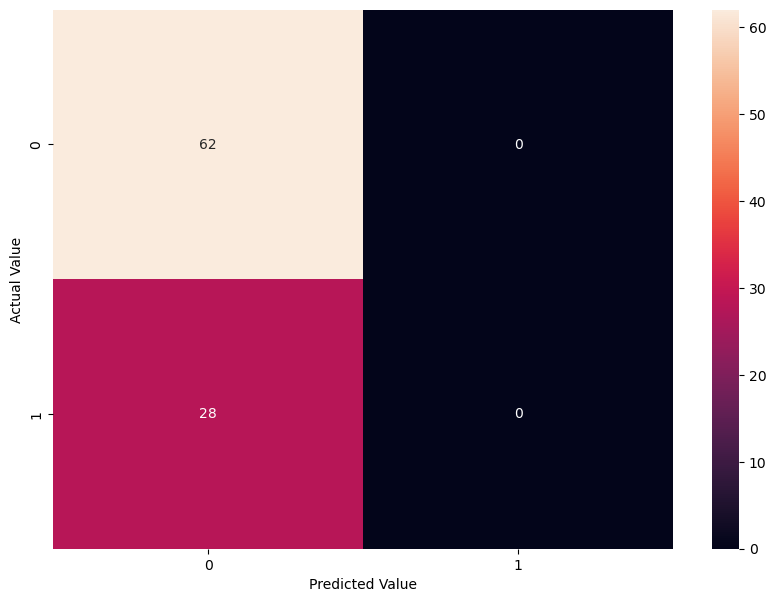

In [20]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_LogReg)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [21]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_LogReg)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.6889



In [22]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_LogReg))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        62
           1       0.00      0.00      0.00        28

    accuracy                           0.69        90
   macro avg       0.34      0.50      0.41        90
weighted avg       0.47      0.69      0.56        90



C:\Users\AMD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Apply Grid Search to find the best parameters for the Logistic Regression model

In [24]:
# To Import the StartifiedKFold Class
from sklearn.model_selection import StratifiedKFold
k_Fold = StratifiedKFold (n_splits=10, shuffle=True, random_state=0)

# To Import the GridSearch Class
from sklearn.model_selection import GridSearchCV

# To Set Parameters to be Optimized Under the Logistic Regression Model
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1'], 'solver': ['liblinear','saga']},
              {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['newton-cg', 'lbfgs', 'saga', 'sag']}]

grid_search = GridSearchCV(estimator = logistic_regression,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_Fold,
                           n_jobs = -1
                          )
grid_search = grid_search.fit(X, Y)
print(grid_search)

C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError:

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=LogisticRegression(max_iter=100000, random_state=0),
             n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1', 'l2'],
                          'solver': ['newton-cg', 'lbfgs', 'saga', 'sag']}],
             scoring='accuracy')


C:\Users\AMD\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [25]:
# To View the Results of the GridSearch
pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.678966,0.015327,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli..."
1,0.678966,0.015327,"{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}"
2,0.675632,0.020418,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin..."
3,0.678966,0.015327,"{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}"
4,0.675632,0.013953,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline..."
...,...,...,...
65,NaN,NaN,"{'C': 1000, 'penalty': 'l1', 'solver': 'sag'}"
66,0.732299,0.045592,"{'C': 1000, 'penalty': 'l2', 'solver': 'newton..."
67,0.678966,0.015327,"{'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}"
68,0.678966,0.015327,"{'C': 1000, 'penalty': 'l2', 'solver': 'saga'}"


In [26]:
# To Identify the Best Accuracy and Best Features

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("BEST ACCURACY SCORE:")
print(best_accuracy)
print('')

print("BEST PARAMETERS:")
print(best_parameters)

BEST ACCURACY SCORE:
0.7324137931034482

BEST PARAMETERS:
{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [27]:
# To Instantiate the Model (Using the Optimized Parameters)
logistic_regression = LogisticRegression(C=100, penalty='l2', solver='newton-cg', random_state=0)

# To Fit the Training Dataset into Logistic Regression Model
logistic_regression.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_LogReg = logistic_regression.predict(X_test)
Y_predict_LogReg

C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AMD\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\AMD\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\AMD\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search f

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual Value')

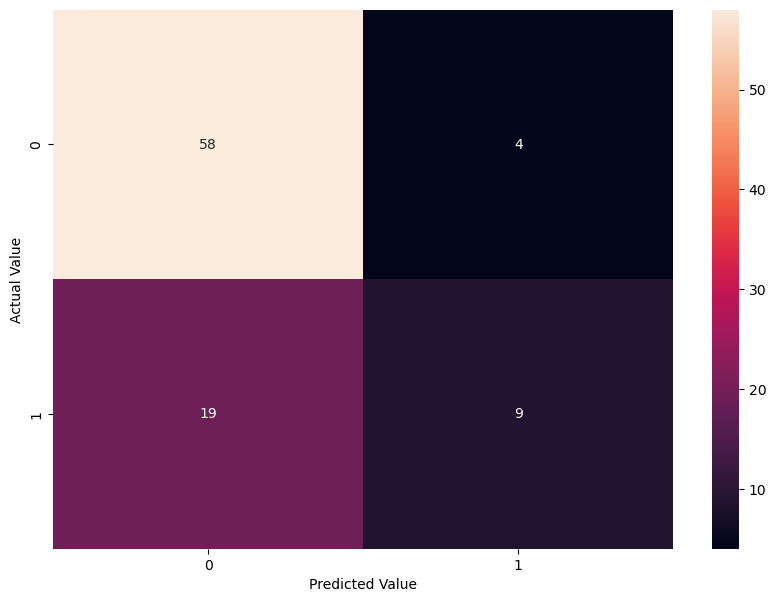

In [28]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_LogReg)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [29]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_LogReg)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.7444



In [30]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_LogReg))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        62
           1       0.69      0.32      0.44        28

    accuracy                           0.74        90
   macro avg       0.72      0.63      0.64        90
weighted avg       0.73      0.74      0.71        90



In [31]:
# K Nearest Neighbor

In [32]:
# To Instantiate the Model (Using the Default Parameters)
k_nearest_neighbors = KNeighborsClassifier()

# To Fit the Training Dataset into K Nearest Neighbors Model
k_nearest_neighbors.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_KNN = k_nearest_neighbors.predict(X_test)
Y_predict_KNN

C:\Users\AMD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual Value')

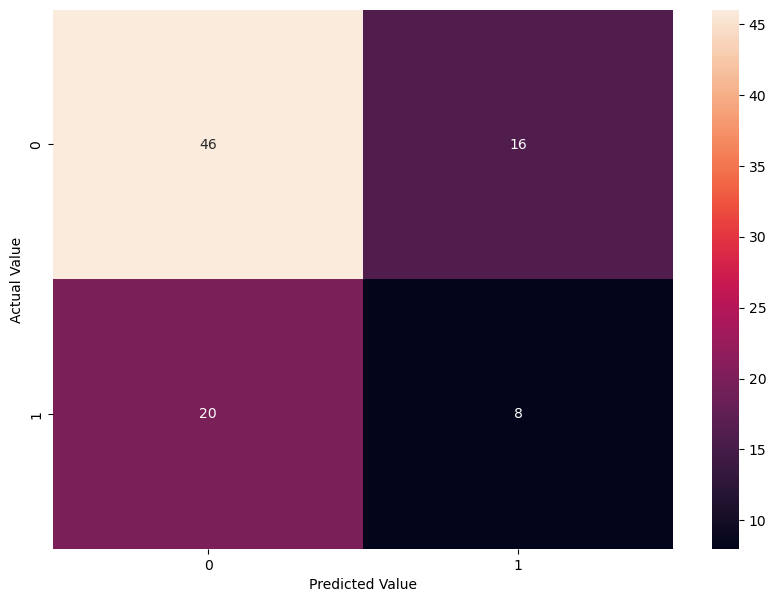

In [33]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_KNN)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [34]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_KNN)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.6000



In [35]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_KNN))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        62
           1       0.33      0.29      0.31        28

    accuracy                           0.60        90
   macro avg       0.52      0.51      0.51        90
weighted avg       0.58      0.60      0.59        90



In [36]:
# Apply Grid Search to K Nearest Neighbor

In [37]:
# To Import the kFold Class
from sklearn.model_selection import StratifiedKFold
k_Fold = StratifiedKFold (n_splits=10, shuffle=True, random_state=0)

# To Import the GridSearch Class
from sklearn.model_selection import GridSearchCV

# To Set Parameters to be Optimized Under the K Nearest Neighbors Model
k_range = list(range(1, 51))
weight = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [10, 20, 30, 40, 50, 60, 70, 80, 100]
p = [1, 2]
parameters = dict(n_neighbors=k_range, weights=weight, algorithm=algorithm, leaf_size=leaf_size)
grid_search = GridSearchCV(estimator = k_nearest_neighbors,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_Fold,
                           n_jobs = -1)
grid_search = grid_search.fit(X, Y)
print(grid_search)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 100],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [38]:
# To View the Results of the GridSearch
pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.555287,0.052892,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
1,0.555287,0.052892,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
2,0.642069,0.052129,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
3,0.555287,0.052892,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
4,0.625402,0.046640,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
...,...,...,...
3595,0.601954,0.073889,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne..."
3596,0.678966,0.015327,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne..."
3597,0.601954,0.073889,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne..."
3598,0.678966,0.015327,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne..."


In [39]:
# To Identify the Best Accuracy and Best Features

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("BEST ACCURACY SCORE:")
print(best_accuracy)
print('')

print("BEST PARAMETERS:")
print(best_parameters)

BEST ACCURACY SCORE:
0.6922988505747126

BEST PARAMETERS:
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 6, 'weights': 'uniform'}


In [40]:
# To Instantiate the Model
k_nearest_neighbors = KNeighborsClassifier(n_neighbors=6, weights='uniform', algorithm='auto', leaf_size=10)

# To Fit the Training Dataset into K Nearest Neighbors Model
k_nearest_neighbors.fit(X_train, Y_train)

# To Predict the Output of the Training Dataset
Y_predict_KNN = k_nearest_neighbors.predict(X_test)
Y_predict_KNN

C:\Users\AMD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual Value')

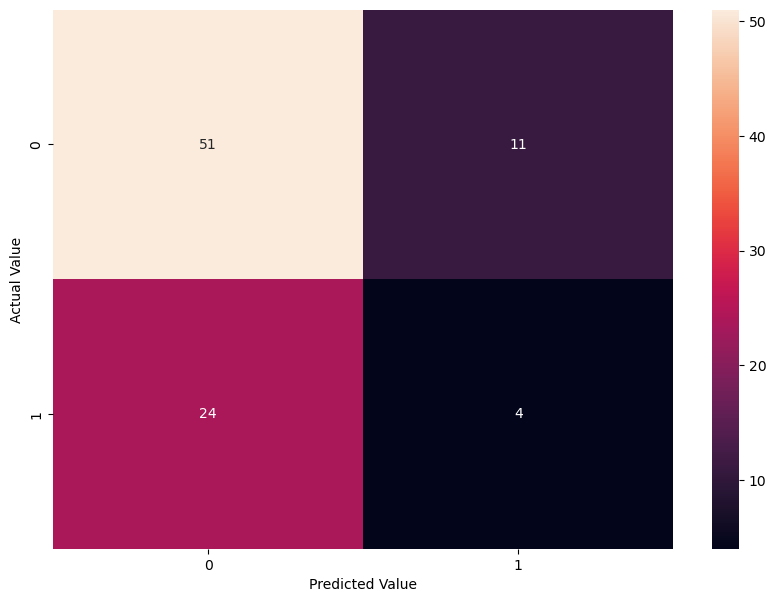

In [41]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_KNN)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [42]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_KNN)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.6111



In [43]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_KNN))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.68      0.82      0.74        62
           1       0.27      0.14      0.19        28

    accuracy                           0.61        90
   macro avg       0.47      0.48      0.47        90
weighted avg       0.55      0.61      0.57        90



In [ ]:
# Support Vector Machine

In [ ]:
# To Instantiate the Model (Using the Default Parameters)
support_vector_machine = SVC(random_state=0)

# To Fit the Training Dataset into Support Vector Machine Model
support_vector_machine.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_SVM = support_vector_machine.predict(X_test)
Y_predict_SVM

In [ ]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_SVM)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [ ]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_SVM)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

In [ ]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_SVM))

In [ ]:
# Apply Grid Search to Support Vector Machine

In [ ]:
# To Import the kFold Class
from sklearn.model_selection import StratifiedKFold
k_Fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# To Import the GridSearch Class
from sklearn.model_selection import GridSearchCV

# To Set Parameters to be Optimized Under the Support Vector Machine Model
parameters = [{'C': [0.001, 0.01, 0.1, 10, 100, 1000], 'kernel': ['linear'], 'decision_function_shape' : ['ovo', 'ovr']},
              {'C': [0.001, 0.01, 0.1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.5, 1, 5, 10], 'decision_function_shape' : ['ovo', 'ovr']},
              {'C': [0.001, 0.01, 0.1, 10, 100, 1000], 'kernel': ['poly'], 'gamma': [0.1, 0.5, 1, 5, 10], 'degree': [2, 3, 4, 5], 'decision_function_shape' : ['ovo', 'ovr']},
              {'C': [0.001, 0.01, 0.1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.1, 0.5, 1, 5, 10]}]
grid_search = GridSearchCV(estimator = support_vector_machine,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_Fold,
                           n_jobs = -1)
grid_search = grid_search.fit(X, Y)
print(grid_search)

In [ ]:
# To View the Results of the GridSearch
pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

In [ ]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("BEST ACCURACY SCORE:")
print(best_accuracy)
print('')

print("BEST PARAMETERS:")
print(best_parameters)

In [ ]:
# To Instantiate the Model (Using the Optimized Parameters)
state_vector_machine = SVC(C=100, decision_function_shape='ovo', kernel='linear', random_state=0)

# To Fit the Training Dataset into Support Vector Machine Model
state_vector_machine.fit(X_train, Y_train)

# To Predict the Output of the Training Dataset
Y_predict_SVM = state_vector_machine.predict(X_test)
Y_predict_SVM

In [ ]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_SVM)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [ ]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_SVM)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

In [ ]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_SVM))